In [3]:
trainpath=r"D:/Winter Semester 3/AIML/Project/Alzheiemer_image/Alzheimer_s Dataset/train"
testpath=r"D:/Winter Semester 3/AIML/Project/Alzheiemer_image/Alzheimer_s Dataset/test"

In [4]:
import tensorflow
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG, load_img
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SeparableConv2D,BatchNormalization,GlobalAveragePooling2D 
from tensorflow.keras.models import load_model
from PIL import Image
from tensorflow.keras.applications.xception import preprocess_input
import numpy as np

In [5]:
img_size=180
img_size_dim=[180,180]
dimension=(img_size,img_size)
zoom=[0.99,1.01]
bright=[0.8,1.2]
fill_mode='constant'
data_format='channels_last'
dir=trainpath
data_gen=IDG(rescale=1./255,brightness_range=bright,zoom_range=zoom,data_format=data_format,fill_mode=fill_mode,horizontal_flip=True)
train_data_gen=data_gen.flow_from_directory(directory=dir,target_size=dimension,batch_size=6000,shuffle=False)

Found 5121 images belonging to 4 classes.


In [6]:
train_data,train_labels=next(train_data_gen)
print(train_data.shape,train_labels.shape)

(5121, 180, 180, 3) (5121, 4)


In [7]:
#handling imbalanced classes
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=47)
train_data,train_labels=sm.fit_resample(train_data.reshape(-1,img_size*img_size*3),train_labels)
train_data=train_data.reshape(-1,img_size,img_size,3)
print(train_data.shape,train_labels.shape)

(10240, 180, 180, 3) (10240, 4)


In [8]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels = train_test_split(train_data,train_labels,test_size=0.2,random_state=47)
train_data,val_data,train_labels,val_labels = train_test_split(train_data,train_labels,test_size=0.2,random_state=47)

In [36]:
import tensorflow as tf

mt = [tf.keras.metrics.CategoricalAccuracy(name='Accuracy'), tf.keras.metrics.AUC(name='AUC')]


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Create a Sequential model
model = models.Sequential()

# Add the first convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))

# Add a max pooling layer with a 2x2 pool size
model.add(layers.MaxPooling2D((2, 2)))

# Add another convolutional layer with 64 filters, a 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer with a 2x2 pool size
model.add(layers.MaxPooling2D((2, 2)))

# Add a flattening layer to convert the 3D feature maps to 1D feature vectors
model.add(layers.Flatten())

# Add a fully connected layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Add the output layer with 10 units (assuming 10 classes) and softmax activation for classification
model.add(layers.Dense(4, activation='softmax'))

# Compile the model with the Adam optimizer and categorical cross-entropy loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=mt)

# Print a summary of the model architecture
model.summary()

c:\Users\harsa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     7,573,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,593,220 (28.97 MB)

 Trainable params: 7,593,220 (28.97 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history=model.fit(train_data,train_labels,validation_data=(val_data,val_labels),epochs=5)

Epoch 1/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 75s 355ms/step - AUC: 0.7029 - Accuracy: 0.4559 - loss: 1.4442 - val_AUC: 0.9587 - val_Accuracy: 0.7993 - val_loss: 0.4942
Epoch 2/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 76s 371ms/step - AUC: 0.9729 - Accuracy: 0.8410 - loss: 0.3944 - val_AUC: 0.9720 - val_Accuracy: 0.8383 - val_loss: 0.3880
Epoch 3/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 77s 376ms/step - AUC: 0.9939 - Accuracy: 0.9324 - loss: 0.1886 - val_AUC: 0.9798 - val_Accuracy: 0.8707 - val_loss: 0.3421
Epoch 4/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 72s 353ms/step - AUC: 0.9955 - Accuracy: 0.9380 - loss: 0.1554 - val_AUC: 0.9887 - val_Accuracy: 0.9109 - val_loss: 0.2415
Epoch 5/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 73s 356ms/step - AUC: 0.9993 - Accuracy: 0.9763 - loss: 0.0629 - val_AUC: 0.9890 - val_Accuracy: 0.9329 - val_loss: 0.2147


In [37]:
from keras.models import Model

def freeze_layers(model):
    for i in model.layers:
        i.trainable = False
        if isinstance(i, Model):
            freeze_layers(i)
    return model

In [38]:
model_freezed = freeze_layers(model)
#model_freezed.save('alzheimer_3.h5')

In [39]:
model_freezed.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     7,573,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,779,662 (86.90 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,593,220 (28.97 MB)

 Optimizer params: 15,186,442 (57.93 MB)

In [15]:
test_model=load_model(r"D:\Winter Semester 3\AIML\Project\alzheimer_3.h5")

In [16]:
img=image.load_img(r"D:\Winter Semester 3\STS\Cat-2\hello.jpg")
img=img.resize((180,180))

In [17]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)

In [18]:
print(np.argmax(test_model.predict(x),axis=1)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
2


In [ ]:

"D:\Winter Semester 3\AIML\Project\Alzheiemer_image\Alzheimer_s Dataset\test\VeryMildDemented\26 (44).jpg"
"D:\Winter Semester 3\AIML\Project\Alzheiemer_image\Alzheimer_s Dataset\test\NonDemented\26 (62).jpg"


In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
loaded_model = tf.keras.models.load_model(r"D:\Winter Semester 3\AIML\Project\alzheimer_3.h5")

# Check the model's summary to understand the architecture and input shape
loaded_model.summary()

# Load and preprocess the new image
img_path =r"D:\Winter Semester 3\STS\Cat-2\hello.jpg"  # Replace 'path_to_new_image.jpg' with the actual path to your image
img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to match input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.  # Normalize pixel values




Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │     7,573,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,593,222 (28.97 MB)

 Trainable params: 7,593,220 (28.97 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

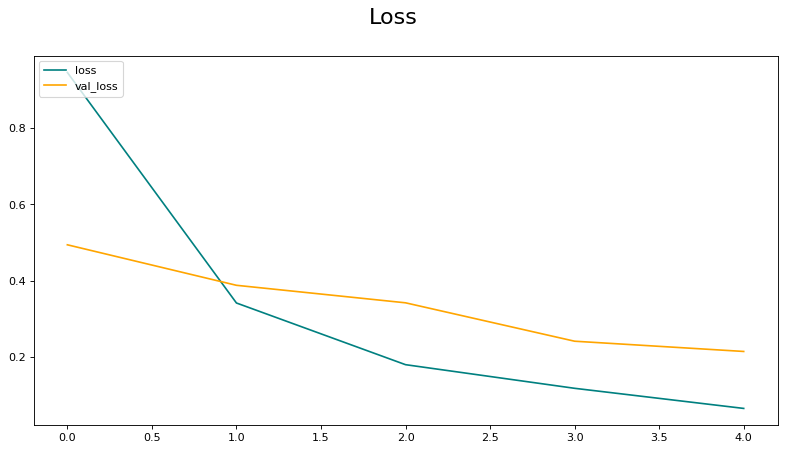

In [51]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(12, 6), dpi=80)
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

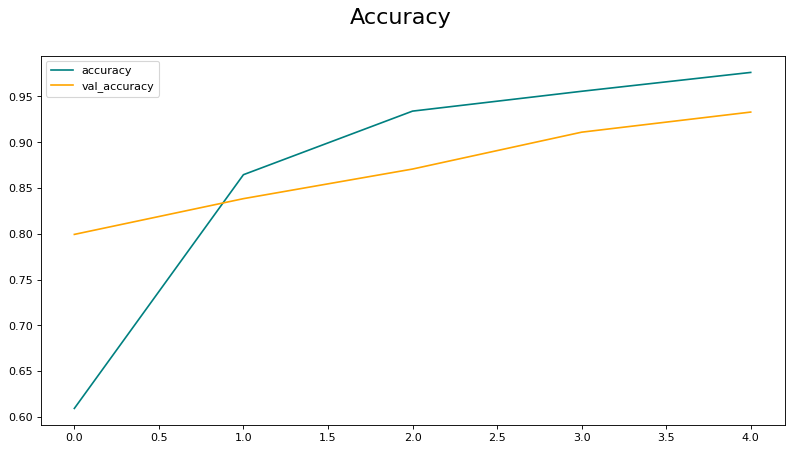

In [57]:
fig = plt.figure(figsize=(12, 6), dpi=80)
plt.plot(history.history['Accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_Accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [65]:
# Evaluate the model on test data
test_loss_accuracy = model.evaluate(test_data, test_labels)
y_pred = model.predict(test_data).argmax(axis=1)
predicted_class = np.argmax(y_pred)
test_loss = test_loss_accuracy[0]
test_accuracy = test_loss_accuracy[1]

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - AUC: 0.9921 - Accuracy: 0.9377 - loss: 0.1867
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step
Test Loss: 0.21458502113819122
Test Accuracy: 0.9897463917732239


In [61]:
from sklearn import metrics
import pandas as pd
df = pd.DataFrame(
  data = metrics.confusion_matrix(np.argmax(test_labels, axis=1), y_pred),
  columns = ['0', '1', '2', '3'],
  index = ['0', '1', '2', '3']
)
df

,0,1,2,3
0,505,0,2,3
1,0,503,0,0
2,22,0,431,46
3,23,0,46,467


<AxesSubplot:>

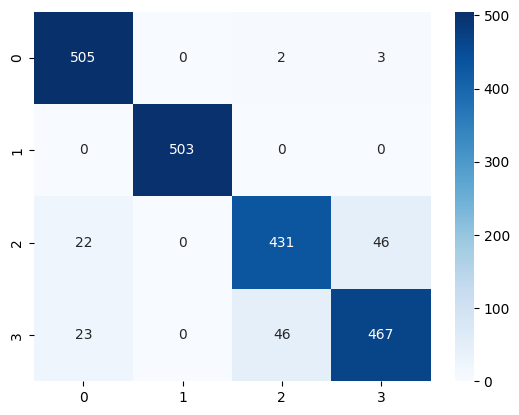

In [68]:
import seaborn as sns

sns.heatmap(df, cmap="Blues", annot=True, fmt='.0f')

In [82]:
from sklearn.metrics import classification_report

# Assuming you have your test labels and predicted classes
# Replace test_labels and predicted_classes with your actual data

# Convert one-hot encoded test labels to integer format
test_labels_int = np.argmax(test_labels, axis=1)

# Generate classification report
report = classification_report(test_labels_int, predicted_classes, target_names=class_names)

print("Classification Report:")
print(report)


Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.96      0.98      0.97       510
ModerateDemented       1.00      1.00      1.00       503
     NonDemented       0.91      0.91      0.91       499
VeryMildDemented       0.92      0.90      0.91       536

        accuracy                           0.95      2048
       macro avg       0.95      0.95      0.95      2048
    weighted avg       0.95      0.95      0.95      2048

